<a href="https://colab.research.google.com/github/LaryssaPortfolio/teste/blob/main/Projeto_EDA_Rede_de_Varejo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**

Nessa análise, o objetivo é responder perguntas de **Negócio** de uma Rede de varejo dos EUA.

Com isso, o objetivo principal é gerar insights para a empresa a fim de direcionar seus investimentos da melhor forma possível.



In [12]:
#Importando os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
plt.style.use('ggplot')

#Tirando os avisos para não poluir a visualização
import warnings
warnings.filterwarnings('ignore')

# **Carregando a base de dados**

In [13]:
df = pd.read_csv('dataset.csv')

In [14]:
#Verificando a quantidade de linhas e colunas
df.shape

(9700, 11)

In [15]:
#Observando as 5 primeiras linhas do Dataframe
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


In [16]:
#Observando as 5 últimas linhas do Dataframe
df.tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
9695,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.830
9696,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.320
9697,CA-2018-154116,15/12/2018,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.776
9698,CA-2017-105291,30/10/2017,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.620
9699,CA-2018-147032,31/07/2018,LB-16795,Home Office,United States,Wilmington,Delaware,OFF-PA-10003256,Office Supplies,Paper,11.540


# **Iniciando a Análise Exploratória**

In [17]:
# Colunas presentes do Dataframe
df.columns

Index(['ID_Pedido', 'Data_Pedido', 'ID_Cliente', 'Segmento', 'Pais', 'Cidade',
       'Estado', 'ID_Produto', 'Categoria', 'SubCategoria', 'Valor_Venda'],
      dtype='object')

In [18]:
# Verificando os tipos de dados presentes no Dataframe
df.dtypes

ID_Pedido        object
Data_Pedido      object
ID_Cliente       object
Segmento         object
Pais             object
Cidade           object
Estado           object
ID_Produto       object
Categoria        object
SubCategoria     object
Valor_Venda     float64
dtype: object

In [19]:
# Resumo estatistico da variável 'Valor_Venda'
df['Valor_Venda'].describe()

count     9700.000000
mean       230.469892
std        627.504252
min          0.444000
25%         17.248000
50%         54.272000
75%        209.932500
max      22638.480000
Name: Valor_Venda, dtype: float64

In [20]:
# Verificando se há registros duplicados
df[df.duplicated()]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda


**Conclusão:** Não há duplicidade no Dataframe

In [21]:
# Verificando se há valores nulos
df.isnull().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Cidade          0
Estado          0
ID_Produto      0
Categoria       0
SubCategoria    0
Valor_Venda     0
dtype: int64

**Conclusão:** Não há valores nulos no Dataframe

### *Podemos concluir que o dataframe não precisa ser tratado em relação a **valores nulos e duplicidade**, sendo assim, podemos dar continuidade em nossa análise.*

# **Cidade com maior valor de venda de produtos da categoria "Technology"**

In [22]:
# Primeiro filtramos os dados da categoria "Technology"
df_1 = df[df['Categoria'] == 'Technology']


In [23]:
# Agrupamos o df_1 por cidade e calculamos o total de valor_venda
df_1_total = df_1.groupby('Cidade') ['Valor_Venda'].sum()

In [24]:
# Verificando a cidade com maior valor de venda
cidade_maior_venda = df_1_total.idxmax()
print('Cidade com maior valor de venda de produtos da categoria "Technology": ', cidade_maior_venda)

Cidade com maior valor de venda de produtos da categoria "Technology":  New York City


In [25]:
# Verificando o resultado obtido
df_1_total.sort_values(ascending= False)

Cidade
New York City    108890.166
Los Angeles       72109.912
Seattle           42266.402
Philadelphia      41662.143
San Francisco     31035.092
                    ...    
Visalia               7.920
Mesquite              5.544
Pompano Beach         2.376
Sheboygan             1.980
Memphis               1.584
Name: Valor_Venda, Length: 340, dtype: float64

# **Total de vendas por Estado**

In [26]:
# Agrupamos por Estado e calculamos o total de valor_venda
df_2 = df.groupby('Estado')['Valor_Venda'].sum().reset_index()

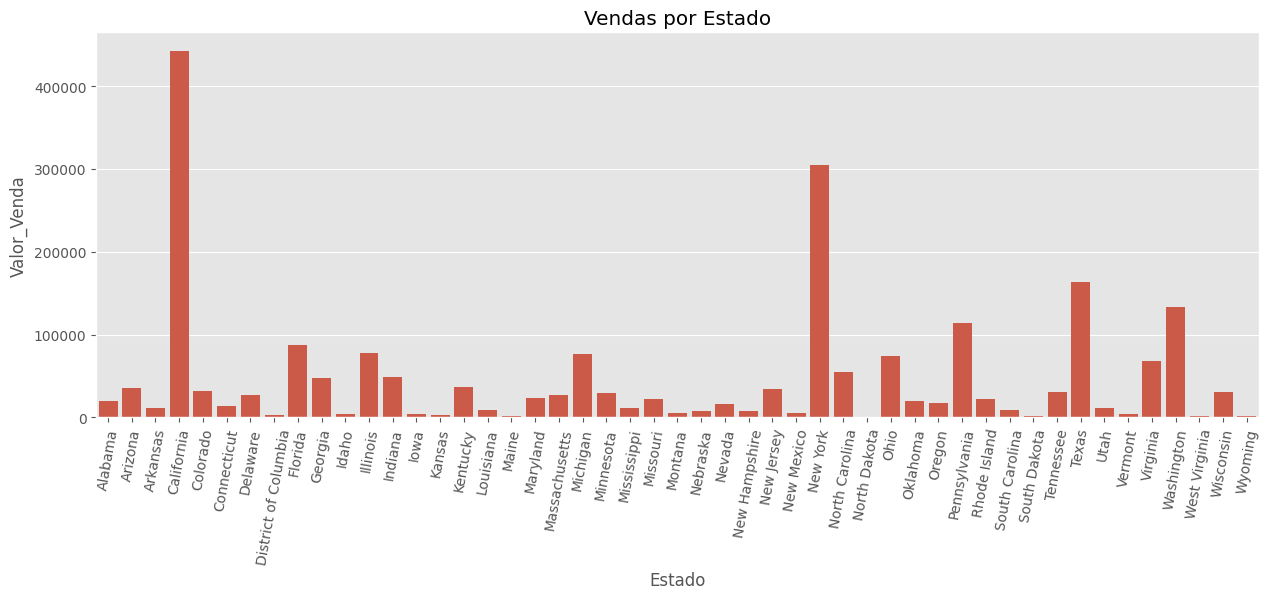

In [27]:
# Construindo um gráfico de barras para melhor visualização
plt.figure(figsize= (15,5))
sns.barplot(data = df_2, x = 'Estado', y = 'Valor_Venda').set(title = 'Vendas por Estado')
plt.xticks(rotation = 80)
plt.show()



# **TOP 5 Cidades com maior total de vendas**

In [28]:
# Agrupamos por Estado, calculamos o total de vendas, Ordenamos apenas os 10 primeiros registros
df_3 = df.groupby('Estado')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending= False).head(5)


In [29]:
df_3.head(5)

,Estado,Valor_Venda
3,California,442927.0975
30,New York,304536.4010
41,Texas,163549.8602
45,Washington,133826.0060
36,Pennsylvania,114411.6800


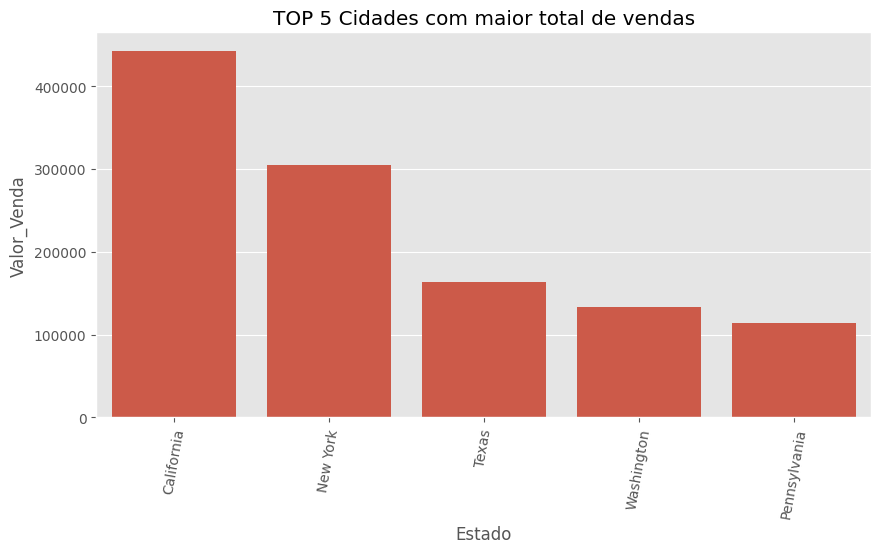

In [30]:
# Construindo um gráfico de barras para melhor visualização
plt.figure(figsize= (10,5))
sns.barplot(data = df_3, x = 'Estado', y = 'Valor_Venda').set(title = 'TOP 5 Cidades com maior total de vendas')
sns.set_palette("coolwarm")
plt.xticks(rotation = 80)
plt.show()


# **Segmento com maior total de vendas**

In [31]:
# Agrupamos por Segmento, calculamos o total de vendas, Ordenamos apenas os 10 primeiros registros
df_4 = df.groupby('Segmento')['Valor_Venda'].sum().reset_index().sort_values(by = 'Valor_Venda', ascending= False)

In [32]:
df_4

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


In [33]:
# Formatando o Valor_Venda em formato de moeda para melhor visulização dos dados
def autopct_format(values):
  def my_format(pct):
    total = sum(values)
    val = int(round(pct * total/100.0))
    return ' $ {v:d}'.format(v = val)
  return my_format

In [34]:
df_4

,Segmento,Valor_Venda
0,Consumer,1.133834e+06
1,Corporate,6.792322e+05
2,Home Office,4.224914e+05


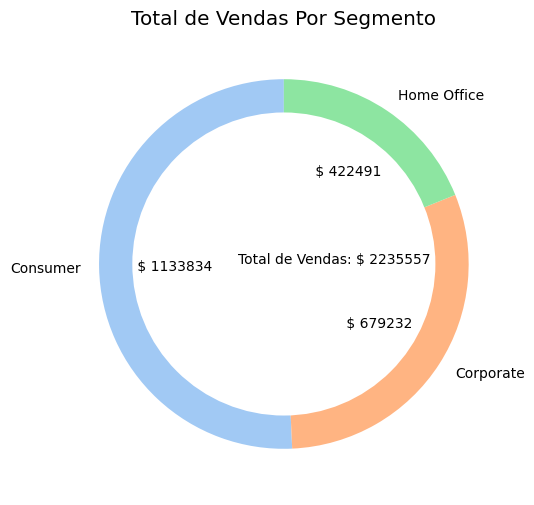

In [35]:
#Criando um gráfico de pizza para melhor visualização
# Tamanho da figura
plt.figure(figsize = (16, 6))

# Gráfico de pizza
sns.set_palette("pastel")
plt.pie(df_4['Valor_Venda'],
        labels = df_4['Segmento'],
        autopct = autopct_format(df_4['Valor_Venda']),
        startangle = 90)

# Limpa o círculo central
centre_circle = plt.Circle((0, 0), 0.82, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Labels e anotações
plt.annotate(text = 'Total de Vendas: ' + '$ ' + str(int(sum(df_4['Valor_Venda']))), xy = (-0.25, 0))
plt.title('Total de Vendas Por Segmento')
plt.show()

**Conclusão:** Após visualizarmos o gráfico, verificamos que **'Consumer'** foi o segmento que mais teve vendas, com um total de $1.133.834,00.

# **Total de vendas por Segmento e Por Ano**

In [36]:
df.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda
0,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600
1,CA-2017-152156,08/11/2017,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400
2,CA-2017-138688,12/06/2017,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200
3,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775
4,US-2016-108966,11/10/2016,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680


**Conclusão:** Verificamos que  a nossa base não possui a coluna Ano, somente a coluna Data_Pedido, sendo assim, iremos converter essa coluna e criar uma nova coluna chamada **Ano**.

In [37]:
# Convertendo a coluna Data_pedido para datetime
df['Data_Pedido'] = pd.to_datetime(df['Data_Pedido'], dayfirst = True)

In [38]:
# Criando a variável ano da extração da variável Data_pedido
df['Ano'] = df['Data_Pedido'].dt.year

In [39]:
# Agrupamos por Ano e Segmento, calculamos o total de vendas, Ordenamos apenas os 10 primeiros registros
df_5 = df.groupby(['Ano', 'Segmento'])['Valor_Venda'].sum()

In [40]:
df_5 = pd.DataFrame(df_5)

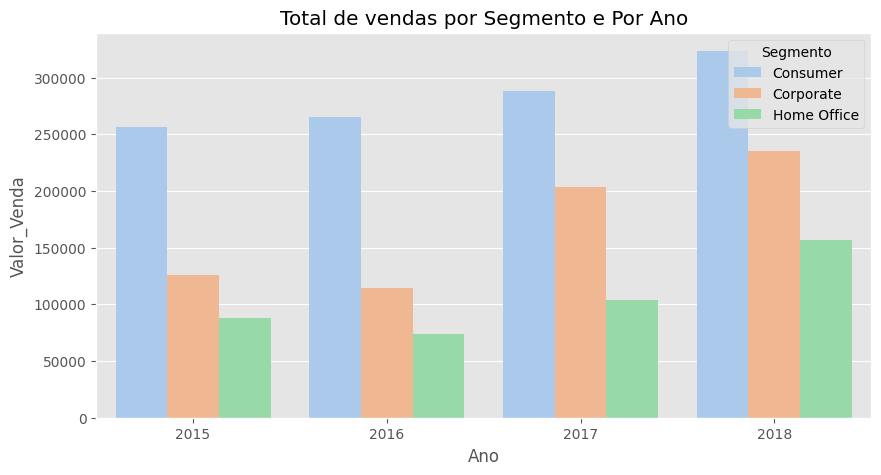

In [41]:
# Construindo um gráfico de barras para melhor visualização
plt.figure(figsize=(10, 5))
sns.set_palette("pastel")
sns.barplot(data=df_5, x='Ano', y='Valor_Venda', hue='Segmento').set(title='Total de vendas por Segmento e Por Ano')
plt.show()


# **Desconto**

Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:


*  Se o Valor_Venda for maior que 1500 recebe **10% de desconto**
*  Se o Valor_Venda for menor que 1500 recebe **5% de desconto**.




In [42]:
# Criando uma coluna de Desconto
df['Desconto'] = np.where(df['Valor_Venda'] > 1500, 0.10, 0.05)

In [43]:
df

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.05
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.05
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.05
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.05
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,2018,0.05
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,2018,0.05
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,2018,0.05
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,2017,0.05


In [44]:
#Verificando quantos descontos seriam concedidos
df['Desconto'].value_counts()

0.05    9468
0.10     232
Name: Desconto, dtype: int64

**Conclusão:** 9468 pedidos receberiam 5% de desconto e 232 pedidos 10% de desconto

# **Média de vendas por Segmento, por Ano e por Mês**

In [45]:
# Criando a coluna mês
df['Mês'] = df['Data_Pedido'].dt.month

In [46]:
df

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Cidade,Estado,ID_Produto,Categoria,SubCategoria,Valor_Venda,Ano,Desconto,Mês
0,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-BO-10001798,Furniture,Bookcases,261.9600,2017,0.05,11
1,CA-2017-152156,2017-11-08,CG-12520,Consumer,United States,Henderson,Kentucky,FUR-CH-10000454,Furniture,Chairs,731.9400,2017,0.05,11
2,CA-2017-138688,2017-06-12,DV-13045,Corporate,United States,Los Angeles,California,OFF-LA-10000240,Office Supplies,Labels,14.6200,2017,0.05,6
3,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,FUR-TA-10000577,Furniture,Tables,957.5775,2016,0.05,10
4,US-2016-108966,2016-10-11,SO-20335,Consumer,United States,Fort Lauderdale,Florida,OFF-ST-10000760,Office Supplies,Storage,22.3680,2016,0.05,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9695,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-PA-10004569,Office Supplies,Paper,22.8300,2018,0.05,12
9696,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,OFF-AP-10000027,Office Supplies,Appliances,54.3200,2018,0.05,12
9697,CA-2018-154116,2018-12-15,KM-16660,Consumer,United States,Inglewood,California,TEC-PH-10000675,Technology,Phones,196.7760,2018,0.05,12
9698,CA-2017-105291,2017-10-30,SP-20920,Consumer,United States,San Luis Obispo,California,OFF-FA-10003059,Office Supplies,Fasteners,3.6200,2017,0.05,10


In [47]:
# Agrupando por Ano, Mês e Segmento e calculando Média, médiana e Total
df_6 = df.groupby(['Ano','Mês', 'Segmento'])['Valor_Venda'].agg([np.mean,np.sum, np.median])

In [48]:
df_6

mean         sum  median
Ano  Mês Segmento                                   
2015 1   Consumer     146.736787   6896.6290  36.440
         Corporate    130.886769   1701.5280  51.940
         Home Office  329.855882   5607.5500  62.820
     2   Consumer     117.327926   3167.8540  22.776
         Corporate     69.235333    623.1180  62.310
...                          ...         ...     ...
2018 11  Corporate    341.215278  44357.9862  79.530
         Home Office  247.519423  24009.3840  56.560
     12  Consumer     183.616244  48107.4558  52.533
         Corporate    153.167403  20524.4320  46.460
         Home Office  224.523983  13022.3910  49.260

[144 rows x 3 columns]

In [49]:
# Extraindo os níveis
anos = df_6.index.get_level_values(0)
meses = df_6.index.get_level_values(1)
segmentos = df_6.index.get_level_values(2)

<Figure size 1200x600 with 0 Axes>

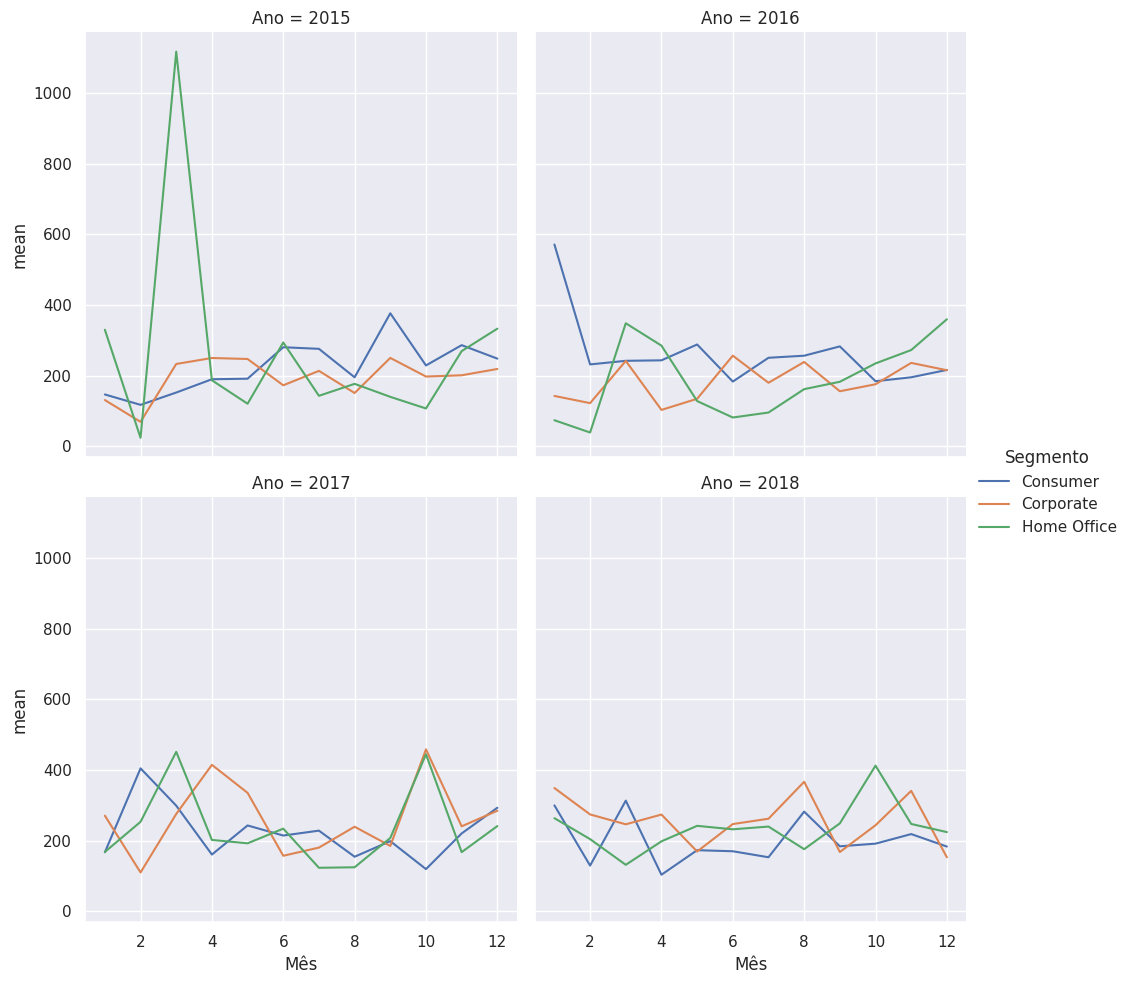

In [50]:
# Criando um gráfico para melhor visualização
plt.figure(figsize= (12,6))
sns.set()
sns.relplot(kind = 'line',
            data = df_6,
            x = meses,
            y = 'mean',
            hue = segmentos,
            col = anos,
            col_wrap= 2);
plt.show()

# **Conclusão**

Através de projeto conseguimos gerar diversos insights e analisar vários aspectos dentro do negócio.

**Questionamentos respondidos ao longo dessa Análise Exploratória:**

*   Cidade com maior valor de venda de produtos da categoria "Technology";
*   Total de vendas por Estado;
*   TOP 5 Cidades com maior total de vendas;
*   Segmento com maior total de vendas;
*   Total de vendas por Segmento e Por Ano;
*   Desconto;
*   Média de vendas por Segmento, por Ano e por Mês.







*Até a próxima Análise*
✌